# 🛒 Zepto Dataset - Exploratory Data Analysis (EDA)
Author: Saumya Ranjan Behera
Goal: Extract insights from Zepto's product catalog for business decisions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('zepto_dataset.csv')
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250


## 🧹 Data Cleaning & Preparation

In [3]:
# Basic info
df.info()

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f'Duplicates: {df.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Category                3732 non-null   object
 1   name                    3732 non-null   object
 2   mrp                     3732 non-null   int64 
 3   discountPercent         3732 non-null   int64 
 4   availableQuantity       3732 non-null   int64 
 5   discountedSellingPrice  3732 non-null   int64 
 6   weightInGms             3732 non-null   int64 
 7   outOfStock              3732 non-null   bool  
 8   quantity                3732 non-null   int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 237.0+ KB
Category                  0
name                      0
mrp                       0
discountPercent           0
availableQuantity         0
discountedSellingPrice    0
weightInGms               0
outOfStock                0
quantity                  0
dtype: in

## 🧪 Feature Engineering

In [9]:
# Add price per kg
df['price_per_kg'] = (df['discountedSellingPrice'] / df['weightInGms']) * 1000
# Add discount value
df['discountValue'] = df['mrp'] - df['discountedSellingPrice']
df['MRP_In_Rupees']=df['mrp']/100
# Add total revenue
df['total_revenue'] = df['discountedSellingPrice'] * df['availableQuantity']
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity,price_per_kg,discountValue,total_revenue,MRP_In_Rupees
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1,2100.000000,400,6300,25.0
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1,3500.000000,700,10500,42.0
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1,74137.931034,800,12900,51.0
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100,17000.000000,300,5100,20.0
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250,4800.000000,200,3600,14.0


## 📊 Univariate Visualizations

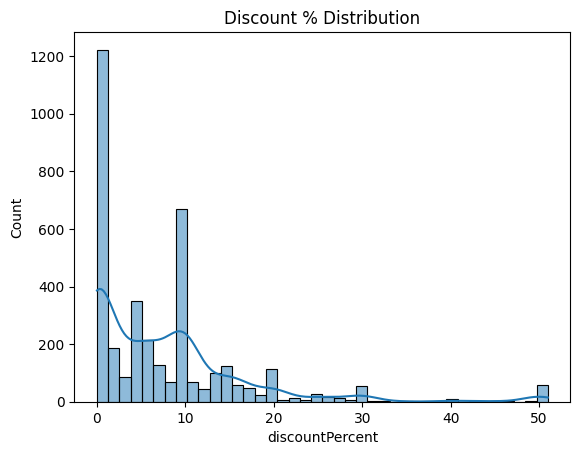

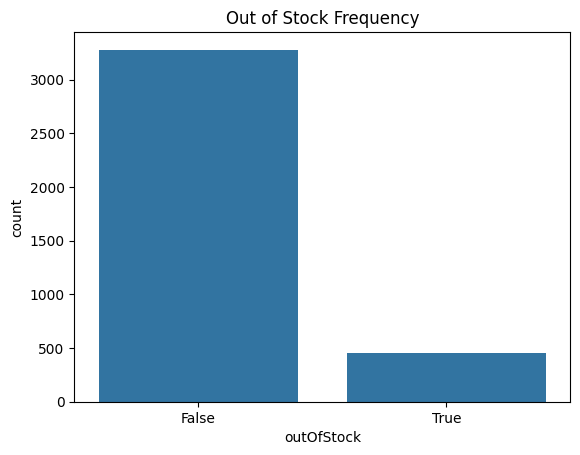

In [5]:
sns.histplot(df['discountPercent'], kde=True)
plt.title('Discount % Distribution')
plt.show()

sns.countplot(x='outOfStock', data=df)
plt.title('Out of Stock Frequency')
plt.show()

## 📈 Bivariate Analysis

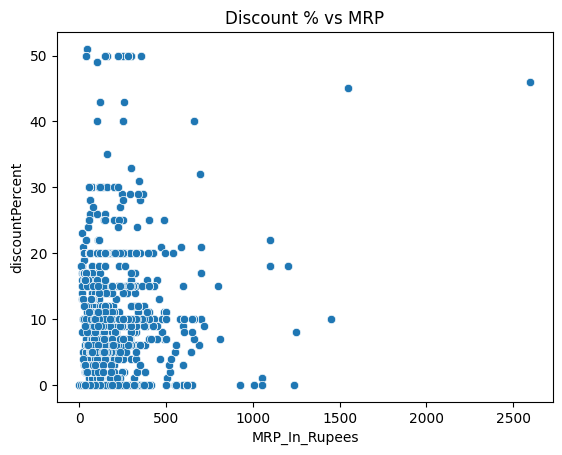

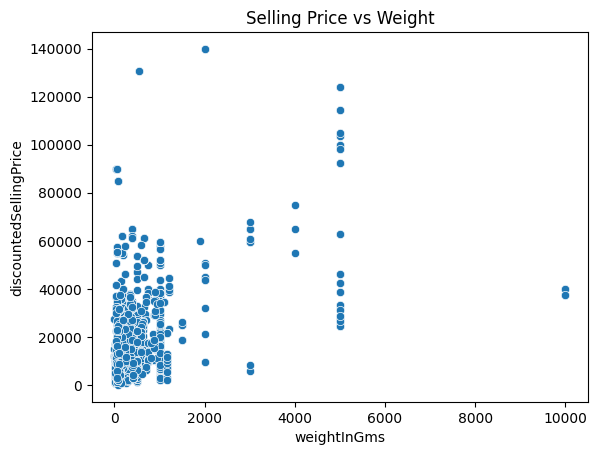

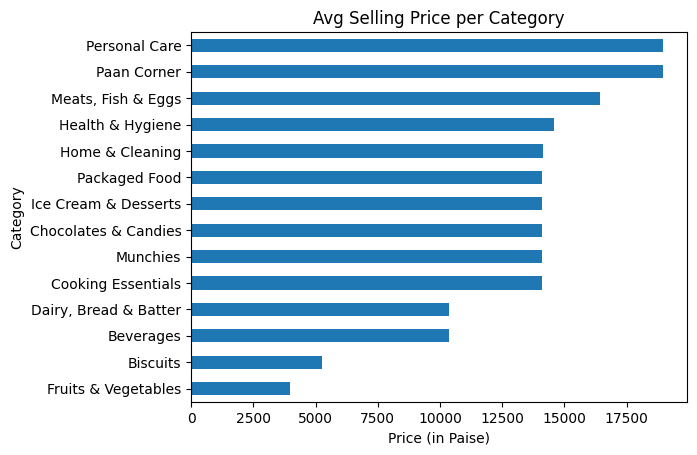

In [10]:
sns.scatterplot(x='MRP_In_Rupees', y='discountPercent', data=df)
plt.title('Discount % vs MRP')
plt.show()

sns.scatterplot(x='weightInGms', y='discountedSellingPrice', data=df)
plt.title('Selling Price vs Weight')
plt.show()

df.groupby('Category')['discountedSellingPrice'].mean().sort_values().plot(kind='barh')
plt.title('Avg Selling Price per Category')
plt.xlabel('Price (in Paise)')
plt.show()

## 🔍 Correlation Heatmap

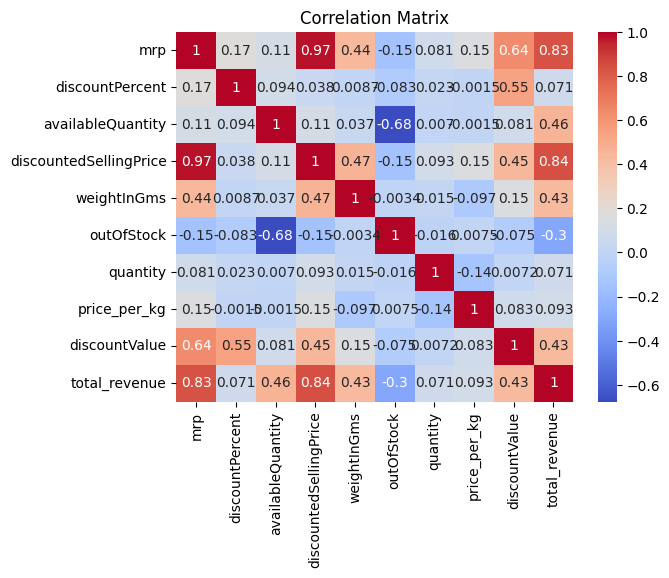

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
import pandas as pd

df = pd.read_csv("zepto_dataset.csv")

# Add new columns
df['price_per_kg'] = (df['discountedSellingPrice'] / df['weightInGms']) * 1000
df['total_revenue'] = df['discountedSellingPrice'] * df['availableQuantity']
df['discountValue'] = df['mrp'] - df['discountedSellingPrice']

# Save the clean version
df.to_csv("zepto_dashboard_ready.csv", index=False)


## 📌 Final Insights from Zepto Dataset

### 💸 Lightweight items show disproportionately high price per kg

#### 🔍 What the data shows:
When calculating `price_per_kg = (selling price / weight) * 1000`, some lightweight items (like herbs, spices, or small packs) appear significantly more expensive on a per-kg basis than heavier staples.

#### 💡 Business Interpretation:
- **Margins**: These products might have higher profit margins due to branding and small packaging sizes.
- **Consumer Misperception**: Shoppers may not realize how expensive these items are per kg when sold in small amounts.
- **Opportunity**:
  - Bundle smaller items for better value perception (e.g., herb packs).
  - Optimize pricing or introduce multi-pack options.

---

### 📦 Frequent stockouts highlight inventory gaps

#### 🔍 What the data shows:
Products frequently marked as `outOfStock = TRUE` suggest demand is regularly exceeding available supply.

#### 💡 Business Interpretation:
- **Lost Sales**: Stockouts result in missed revenue and lower customer satisfaction.
- **High Demand**: Indicates items that may be under-forecasted or mismanaged in inventory.
- **Opportunity**:
  - Implement predictive restocking models.
  - Prioritize restocking of fast-moving or essential products.
  - Monitor high-risk SKUs and set alerts.

---

### 🎯 High discount categories = Upsell or Loyalty Opportunities

#### 🔍 What the data shows:
Certain product categories consistently have higher discount percentages (15–25%), potentially being used to drive traffic.

#### 💡 Business Interpretation:
- **Loss Leaders**: Discounts used to attract customers might reduce profit margins.
- **Stock Clearance**: May indicate overstocked or near-expiry items.
- **Opportunity**:
  - Leverage discounts for cross-sell and upsell (e.g., “Buy 2 snacks, get ₹20 off drinks”).
  - Use discounted items in loyalty or subscription plans.
  - Track how discounts impact repeat purchase behavior.

---

## ✅ Summary Table

| Insight                               | Business Question Solved                                  |
|---------------------------------------|------------------------------------------------------------|
| High price per kg (lightweight items) | Are we pricing too aggressively in some categories?        |
| Frequent stockouts                    | Where are we losing revenue due to inventory issues?       |
| High-discount categories              | How can we turn discounts into loyalty or higher cart size? |




## Generates the EDA Reports using ydata profiling libaries


In [2]:
import pandas as pd
from ydata_profiling import ProfileReport

# Step 1: Load the dataset
df = pd.read_csv("zepto_dashboard_ready.csv")

# Step 2: Generate the profile report
profile = ProfileReport(df, title="Zepto Dataset - EDA Report", explorative=True)

# Step 3: Export it to an HTML file
profile.to_file("Zepto_EDA_Report.html")

print("✅ HTML report generated: Zepto_EDA_Report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
100%|██████████| 12/12 [00:00<00:00, 28.86it/s]
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\model\correlations.py:87: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(c

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ HTML report generated: Zepto_EDA_Report.html
